## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# ↓ increase the output maximum display window and not show the scroll ↓ (the code should take a cell itself only)

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1024px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [4]:
# import example data
iris = datasets.load_iris()

# train test split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# choosing model
DTC = DecisionTreeClassifier()

# train model
DTC.fit(x_train, y_train)

# predict
y_pred = DTC.predict(x_test)

In [5]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Acuuracy: {accuracy}")

Acuuracy: 0.9736842105263158


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(f"Feature importance: {DTC.feature_importances_}")

Feature importance: [0.01796599 0.         0.52229134 0.45974266]


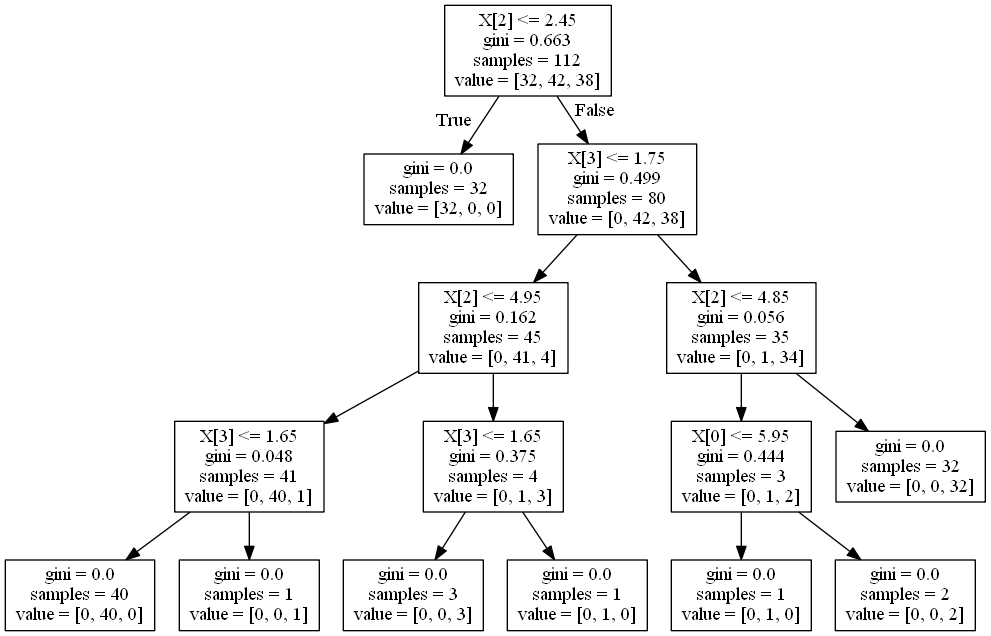

In [8]:
from IPython.display import display, Image 
from sklearn.tree import export_graphviz
import pydotplus
import os
# add environment path for pydotplus to know where the graphviz is
os.environ['PATH'] = os.environ['PATH'] + (';C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz')
dot_data = export_graphviz(DTC)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width=720, height=720)

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [9]:
# improt data
wine = datasets.load_wine()

# train test split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# choosing model
DTC = DecisionTreeClassifier()

# train model
DTC.fit(x_train, y_train)

# predict
y_pred = DTC.predict(x_test)

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Acuuracy: {accuracy}")

Acuuracy: 0.9444444444444444


In [11]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [12]:
print(f"Feature importance: {DTC.feature_importances_}")

Feature importance: [0.         0.01899507 0.02094206 0.         0.         0.
 0.41105326 0.         0.         0.38493424 0.         0.
 0.16407537]


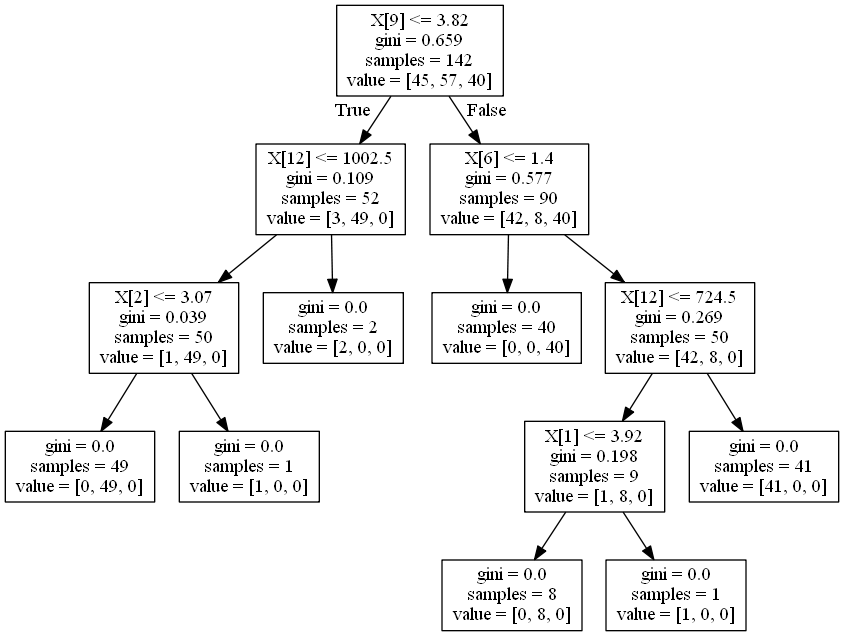

In [13]:
dot_data = export_graphviz(DTC)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(), width=640, height=640)